In [1]:
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd

In [6]:
base_url = "C:\\dsprojects\\data\\"
birds_dataset_url = base_url + "birds.csv"

In [7]:
birds_df = pd.read_csv(birds_dataset_url)

In [36]:
birds_df.columns

Index(['Name', 'ScientificName', 'Category', 'Order', 'Family', 'Genus',
       'ConservationStatus', 'MinLength', 'MaxLength', 'MinBodyMass',
       'MaxBodyMass', 'MinWingspan', 'MaxWingspan'],
      dtype='object')

In [10]:
birds_df.head()

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


In [59]:
birds_df["MaxBodyMass"].min()

3.0

In [60]:
birds_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinLength,443.0,28.536682,20.319887,7.0,13.75,20.5,39.00,138.0
MaxLength,443.0,35.441986,27.539772,8.9,16.00,25.0,46.00,180.0
MinBodyMass,443.0,327.938262,779.680106,2.0,18.00,55.0,332.00,9200.0
MaxBodyMass,443.0,667.009752,1655.682564,3.0,28.00,89.0,593.00,14300.0
MinWingspan,443.0,58.557901,104.602369,8.0,23.00,38.0,72.75,1800.0
MaxWingspan,443.0,67.524492,126.673177,10.6,25.00,42.0,83.00,2300.0


In [55]:
birds_df.isnull().sum()

Name                  0
ScientificName        0
Category              0
Order                 0
Family                0
Genus                 0
ConservationStatus    0
MinLength             0
MaxLength             0
MinBodyMass           0
MaxBodyMass           0
MinWingspan           0
MaxWingspan           0
dtype: int64

In [16]:
cat_cols = [
    "Category",
    "Order",
    "Family",
    "Genus",
    "ConservationStatus"
]

In [20]:
for i in cat_cols:
    a = birds_df[i].value_counts()
    print(a)



Category
Ducks/Geese/Waterfowl              45
New World warblers                 41
Sandpipers/Allies                  34
Gulls/Terns/Skimmers               28
New World sparrows                 26
Tyrant flycatchers                 19
Hawks/Eagles                       15
Troupials/Allies                   14
Finches/Euphonias/Allies           13
Woodpeckers                        12
Thrushes/Allies                    11
Owls                               11
Herons/Egrets/Bitterns             11
Cardinals/Allies                   11
Pheasants/Grouse/Allies             9
Pigeons/Doves                       8
Rails/Gallinules/Coots              8
Hummingbirds                        7
Plovers/Lapwings                    7
Wrens                               7
Swallows                            7
Vireos/Shrike-babblers/Erpornis     7
Grebes                              6
Crows/Jays/Magpies                  6
Falcons /Caracaras                  6
Longspurs/Snow buntings             5
Moc

In [27]:
for i in cat_cols:
    a = birds_df[i].nunique()
    print(f"{i}: {a}")

Category: 60
Order: 21
Family: 59
Genus: 238
ConservationStatus: 6


In [34]:
grouped_counts = birds_df.groupby("Order")["ConservationStatus"].count().sort_values(ascending=False)
#sorted_counts = grouped_counts.sort_values(ascending=False)
#print(sorted_counts)

<Axes: ylabel='Order'>

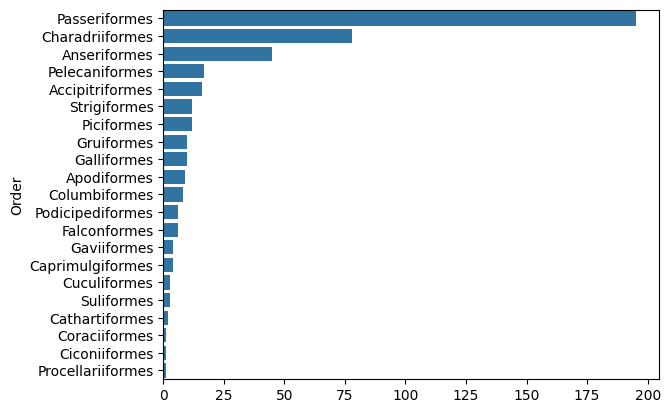

In [35]:
sns.barplot(x = grouped_counts.values, y = grouped_counts.index)

In [38]:
max_lengths_by_family = birds_df.groupby(['Family' , 'Name'])['MaxLength'].max()

# Büyükten küçüğe sıralama
sorted_max_lengths = max_lengths_by_family.sort_values(ascending=False)

# Sonuçları görüntüleme
print(sorted_max_lengths)

Family       Name                     
Anatidae     Trumpeter swan               180.0
Pelecanidae  American white pelican       180.0
Anatidae     Mute swan                    170.0
Gruidae      Whooping crane               160.0
Pelecanidae  Brown pelican                152.0
                                          ...  
Trochilidae  Anna's hummingbird            10.9
             Calliope hummingbird          10.0
             Rufous hummingbird             9.0
             Ruby-throated hummingbird      9.0
             Costa's hummingbird            8.9
Name: MaxLength, Length: 443, dtype: float64


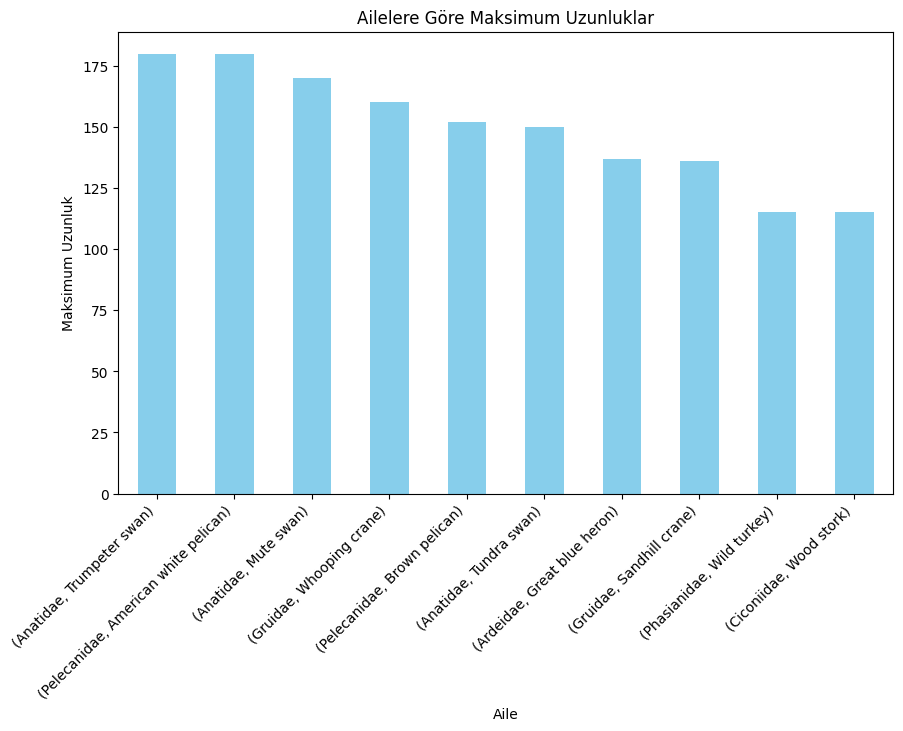

In [44]:
plt.figure(figsize=(10, 6))
sorted_max_lengths[:10].plot(kind='bar', color='skyblue')
plt.title('Ailelere Göre Maksimum Uzunluklar')
plt.xlabel('Aile')
plt.ylabel('Maksimum Uzunluk')
plt.xticks(rotation=45, ha='right')  
plt.show()

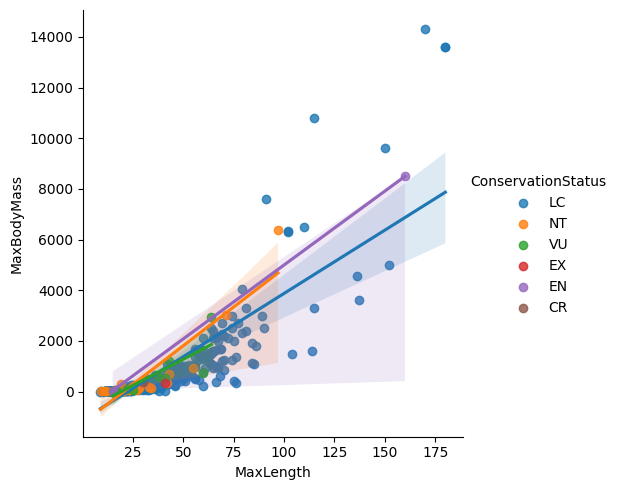

In [47]:
sns.lmplot(
    x="MaxLength", 
    y="MaxBodyMass",
    data = birds_df,
    hue="ConservationStatus"
)

<Axes: xlabel='Family', ylabel='MaxBodyMass'>

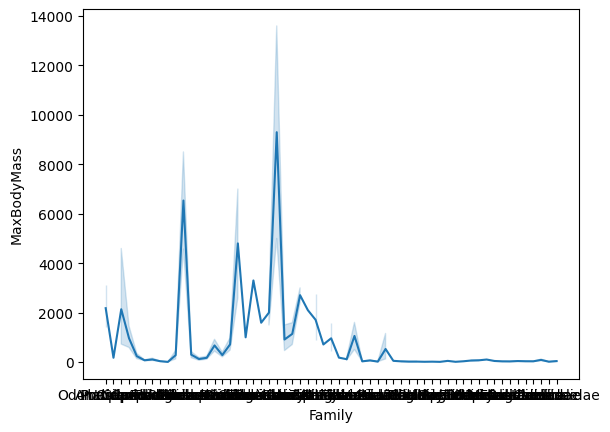

In [51]:
sns.lineplot(x = "Family", y = "MaxBodyMass", data=birds_df)

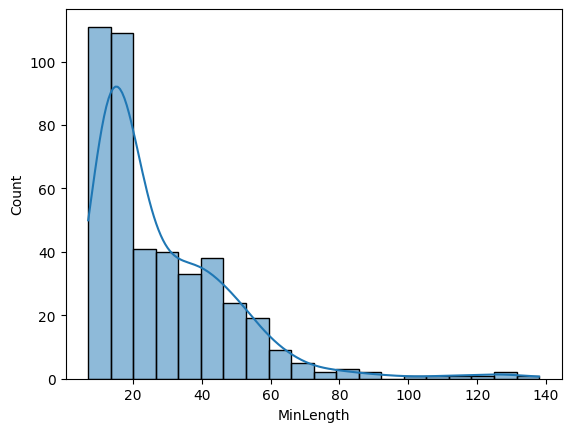

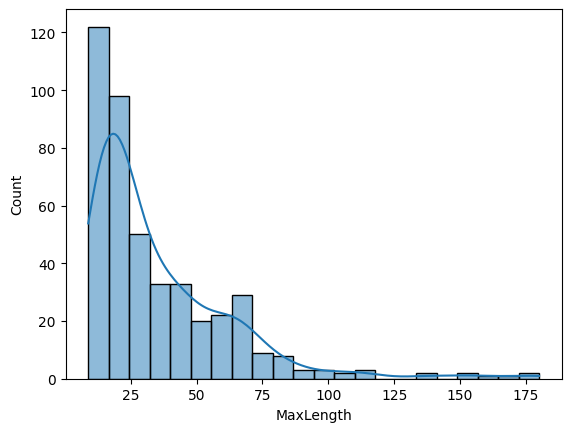

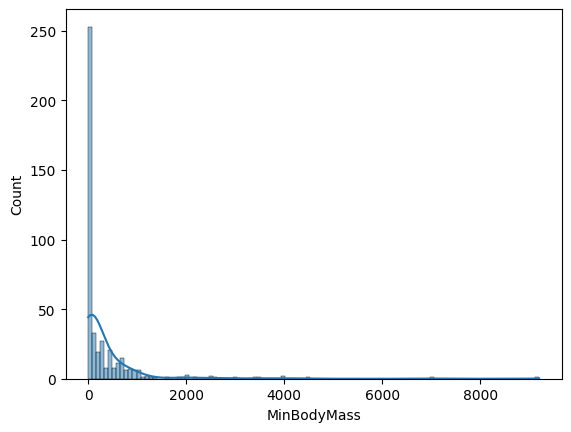

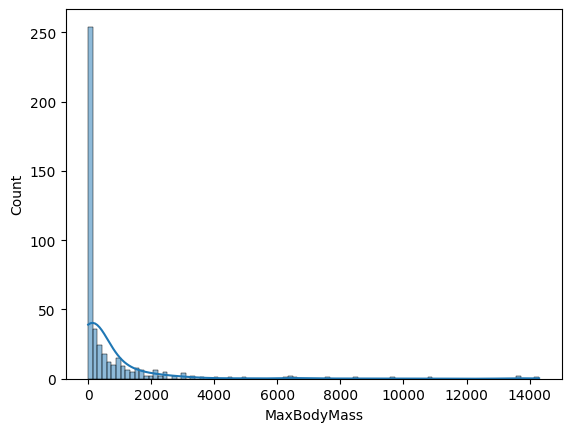

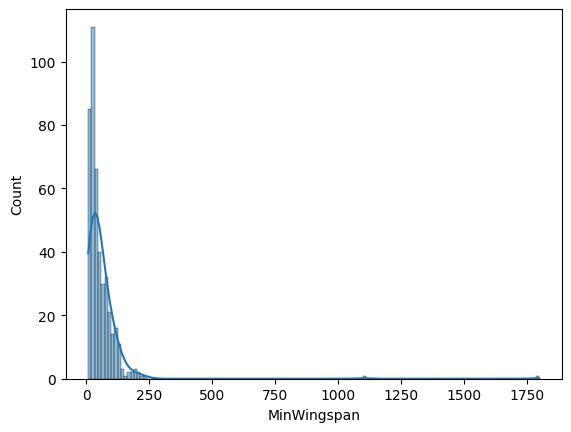

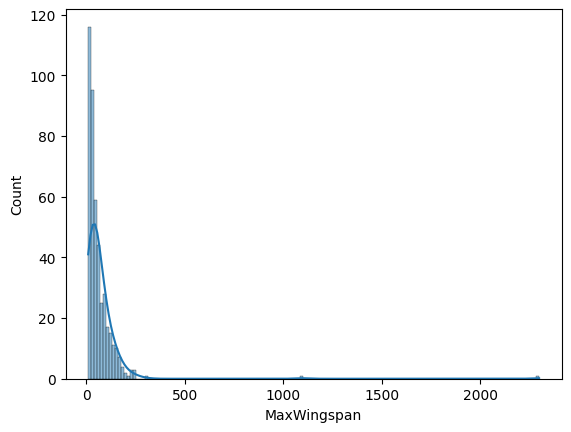

In [68]:
for num in num_cols:
    sns.histplot(x =birds_df[num], kde=True)
    plt.show()


<Axes: xlabel='MaxLength'>

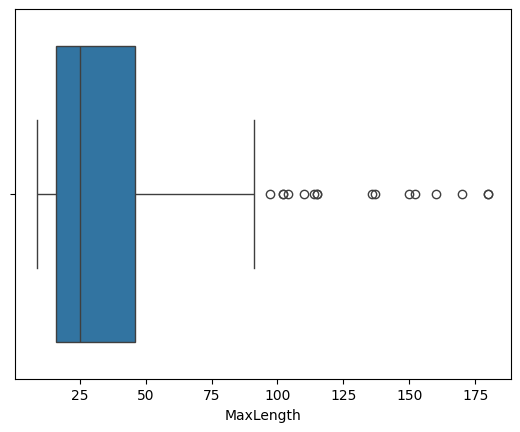

In [62]:

sns.boxplot(x=birds_df['MaxLength'],data=birds_df)

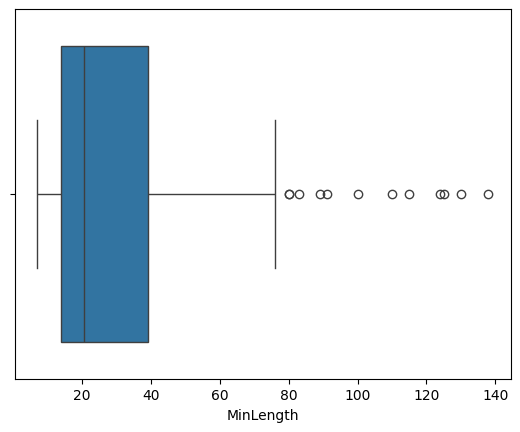

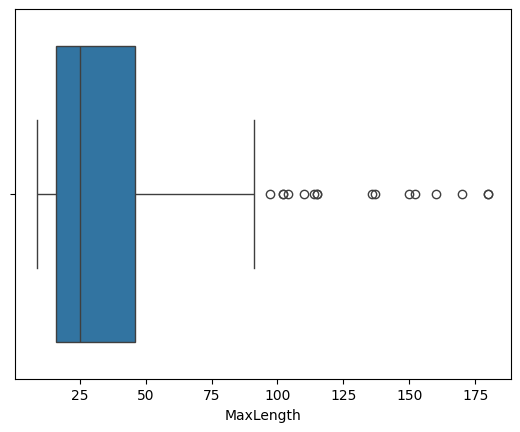

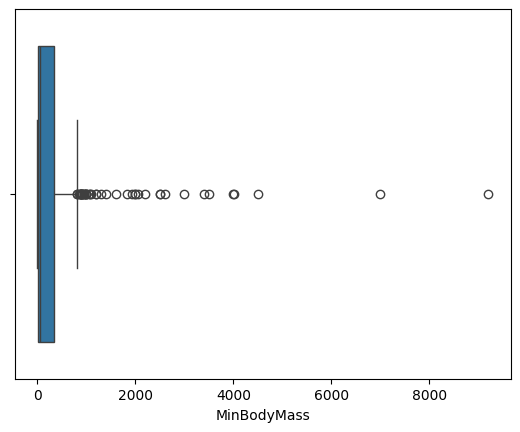

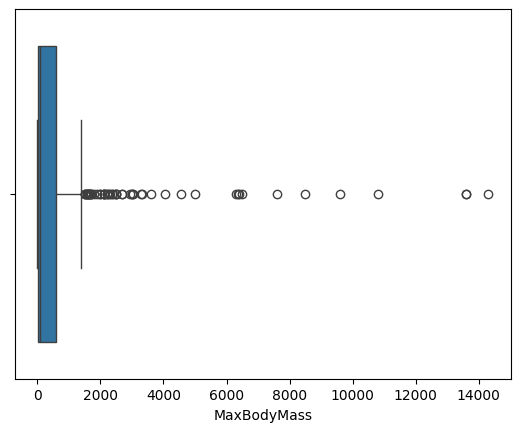

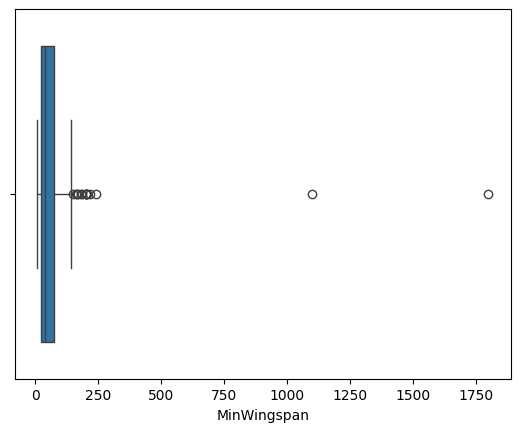

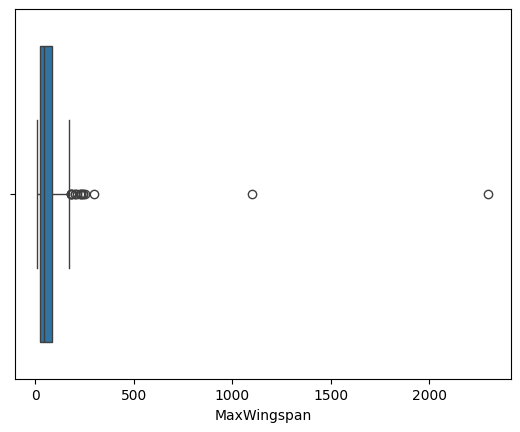

In [65]:
num_cols = [
    "MinLength",
    "MaxLength",
    "MinBodyMass",
    "MaxBodyMass",
    "MinWingspan",	
    "MaxWingspan"
]
for num in num_cols:
    sns.boxplot(x=birds_df[num],data=birds_df)
    plt.show()


In [73]:
max_mass_by_family = birds_df.groupby(['Family' , 'Name'])['MaxBodyMass'].max()

# Büyükten küçüğe sıralama
sorted_max_mass = max_lengths_by_family.sort_values(ascending=False)

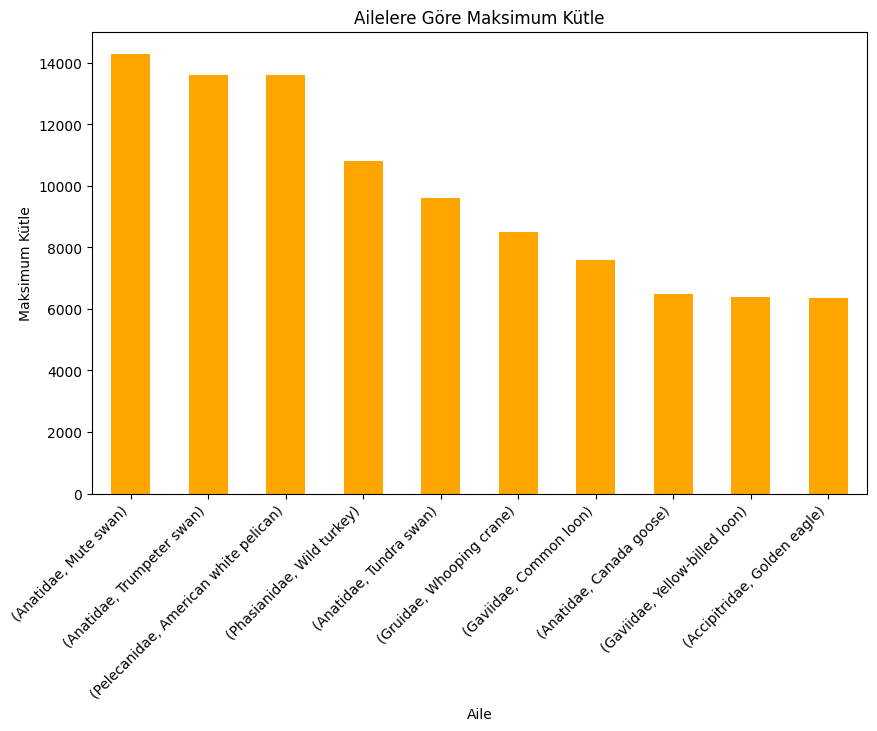

In [74]:
plt.figure(figsize=(10, 6))
sorted_max_mass[:10].plot(kind='bar', color='orange')
plt.title('Ailelere Göre Maksimum Kütle')
plt.xlabel('Aile')
plt.ylabel('Maksimum Kütle')
plt.xticks(rotation=45, ha='right')  
plt.show()